In [3]:
import numpy as np
import os
import cv2
import time
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

### 1.c)

In [4]:
def make_strip_image(strip_width = 2, img_shape = (200,200)):
    img = np.zeros(img_shape)
    M,N = img.shape
    strip = 'white'
    for j in range(0, N, strip_width):
        if strip=='black':
            img[:,j:(j+strip_width)] = 0
            strip = 'white'
        else:
            img[:,j:(j+strip_width)] = 255
            strip = 'black'
        
    return img
        
    

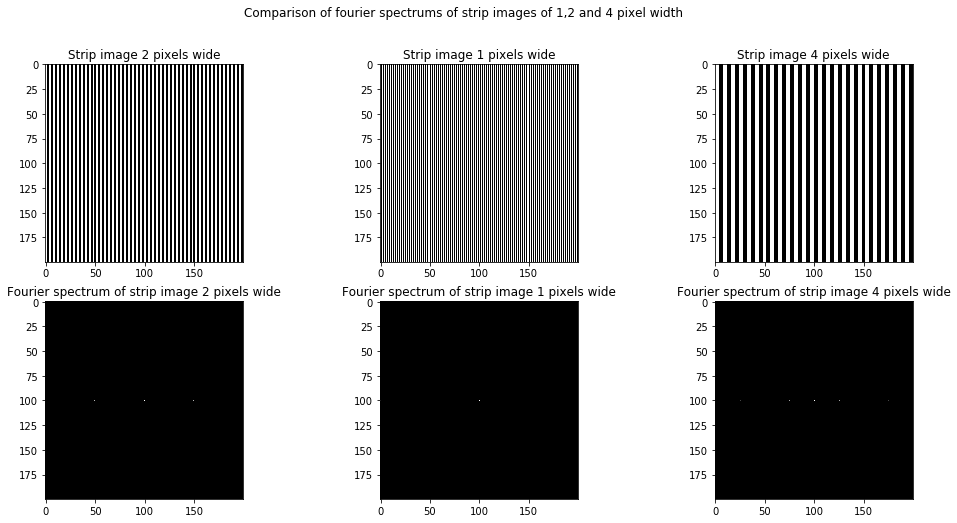

In [5]:
img2pix = make_strip_image()
img2pix_fft =  np.fft.fftshift(np.fft.fft2(img2pix))
magnitude_spectrum2pix = np.abs(img2pix_fft)

img1pix = make_strip_image(strip_width = 1)
img1pix_fft =  np.fft.fftshift(np.fft.fft2(img1pix))
magnitude_spectrum1pix = np.abs(img1pix_fft)

img4pix = make_strip_image(strip_width = 4)
img4pix_fft =  np.fft.fftshift(np.fft.fft2(img4pix))
magnitude_spectrum4pix = np.abs(img4pix_fft)

fig, axs = plt.subplots(2,3, figsize = (17,8))
axs[0,0].imshow(img2pix, cmap = 'gray')
axs[0,0].set_title("Strip image 2 pixels wide")
axs[1,0].imshow(magnitude_spectrum2pix, cmap = 'gray')
axs[1,0].set_title("Fourier spectrum of strip image 2 pixels wide")

axs[0,1].imshow(img1pix, cmap = 'gray')
axs[0,1].set_title("Strip image 1 pixels wide")
axs[1,1].imshow(magnitude_spectrum1pix, cmap = 'gray')
axs[1,1].set_title("Fourier spectrum of strip image 1 pixels wide")

axs[0,2].imshow(img4pix, cmap = 'gray')
axs[0,2].set_title("Strip image 4 pixels wide")
axs[1,2].imshow(magnitude_spectrum4pix, cmap = 'gray')
axs[1,2].set_title("Fourier spectrum of strip image 4 pixels wide")

plt.suptitle("Comparison of fourier spectrums of strip images of 1,2 and 4 pixel width")
plt.show()

In [6]:
M,N = img2pix.shape
magnitude_spectrum1pix[M//2, N//2], magnitude_spectrum4pix[M//2, N//2]

(5100000.0, 5100000.0)

##### Answers:
 
 a) Plots shown above: Image is subplot(1,3) and fourier spectrum of the image is subplot(2,3).
 
 b) Components of the spectrum are only limited to the horizontal axis as the intensity of pixel values change only horizontally from one strip to another. The vertical change in frequency is zero.
 
 c) Plots shown above: Image is subplot(1,2) and fourier spectrum of the image is subplot(2,2).  
 
 d) Dc terms in both a) and c) are same. This is due to the fact that the central DC component is the average brightness of the image which is the same for both. 

### 2)

In [3]:
def apply_box_filter(img,filter_m, filter_n):
    kernel = np.ones((filter_m, filter_n))
    kernel = kernel/(filter_m * filter_n)
    kernel = kernel.astype(np.float32)
    
    res = cv2.filter2D(img,-1,kernel)
    return res

In [4]:
def apply_gaussian_kernel(img, size, std):
    x = cv2.getGaussianKernel(ksize = size, sigma = std)
    kernel = x * x.T
    res = cv2.filter2D(img, -1, kernel)
    return res

In [5]:
def laplacian_filter(img):
    kernel = np.array([[0,1,0],
                       [1,-4,1],
                       [0,1,0]])
    
    res = cv2.filter2D(img, -1, kernel)
    return res

In [6]:
def sobel(img, axis = 1):
    sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

    sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
    
    if axis==1:
        #apply sobel_x for vertical edge detection
        kernel = sobel_x
    else:
        #apply sobel_y for horizontal edge detection
        kernel = sobel_y
    
    kernel = cv2.flip(kernel, -1)
    res = cv2.filter2D(img, -1, kernel)
    return res

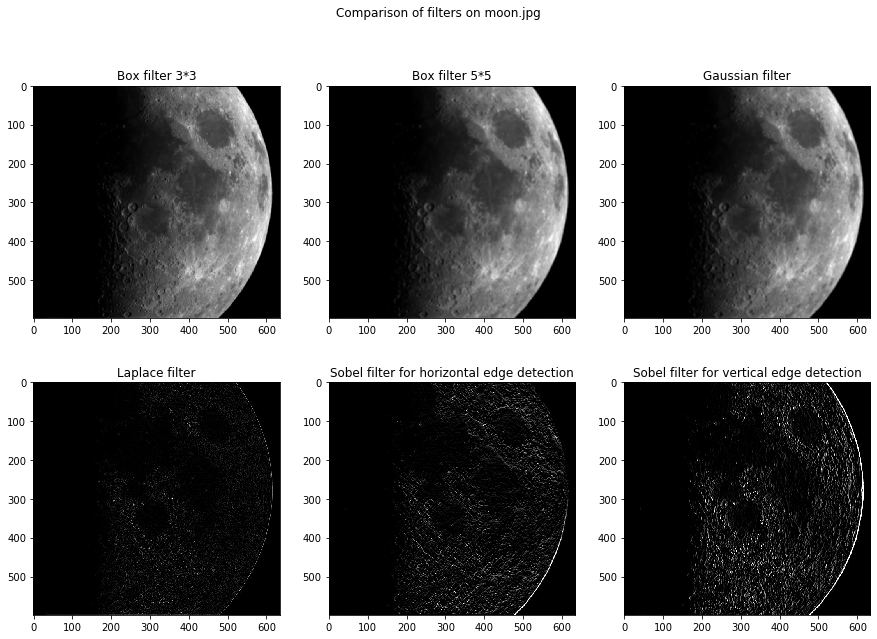

In [7]:
fig, axs = plt.subplots(2,3, figsize = (15, 10))

img_path = 'moon.jpg'
img = cv2.imread(img_path, 0)

box = apply_box_filter(img, 3, 3)
axs[0,0].imshow(box, cmap = 'gray')
axs[0,0].set_title("Box filter 3*3")

box = apply_box_filter(img, 5, 5)
axs[0,1].imshow(box, cmap = 'gray')
axs[0,1].set_title("Box filter 5*5")

gaussian = apply_gaussian_kernel(img, 5, 10)
axs[0,2].imshow(gaussian, cmap = 'gray')
axs[0,2].set_title("Gaussian filter")

laplace = laplacian_filter(img)
axs[1,0].imshow(laplace, cmap = 'gray')
axs[1,0].set_title("Laplace filter")

sobel_x = sobel(img,0)
axs[1,1].imshow(sobel_x, cmap = 'gray')
axs[1,1].set_title("Sobel filter for horizontal edge detection")

sobel_y = sobel(img,1)
axs[1,2].imshow(sobel_y, cmap = 'gray')
axs[1,2].set_title("Sobel filter for vertical edge detection")

plt.suptitle("Comparison of filters on moon.jpg")
plt.show()


### 3) 

In [46]:
def make_img(rectangle_size):
    img = np.zeros((100,100), dtype = np.uint8)
    M,N = img.shape
    
    c_row = M//2
    c_col = N//2
    
    rec_m, rec_n = rectangle_size
    img[(c_row - (rec_m//2)): (c_row+(rec_m//2)), (c_col - (rec_n//2)): (c_col+(rec_n//2))] = 255
    
    return img

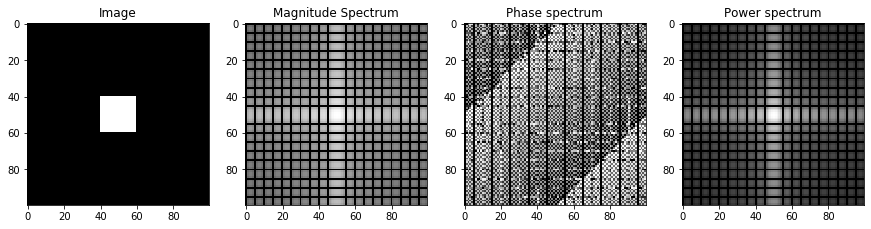

In [50]:
fig, axs = plt.subplots(1,4, figsize = (15,6))
img = make_img((20,20))
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum, phase_spectrum = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])

magnitude_spectrum = 20 * np.log(1+magnitude_spectrum)
power_spectrum = np.power(magnitude_spectrum,2) 

axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Image")
axs[1].imshow(magnitude_spectrum, cmap = 'gray')
axs[1].set_title("Magnitude Spectrum")
axs[2].imshow(phase_spectrum, cmap = 'gray')
axs[2].set_title("Phase spectrum")
axs[3].imshow(power_spectrum, cmap = 'gray')
axs[3].set_title("Power spectrum")


plt.show()

### 4) 

a) Spatial domain filtering

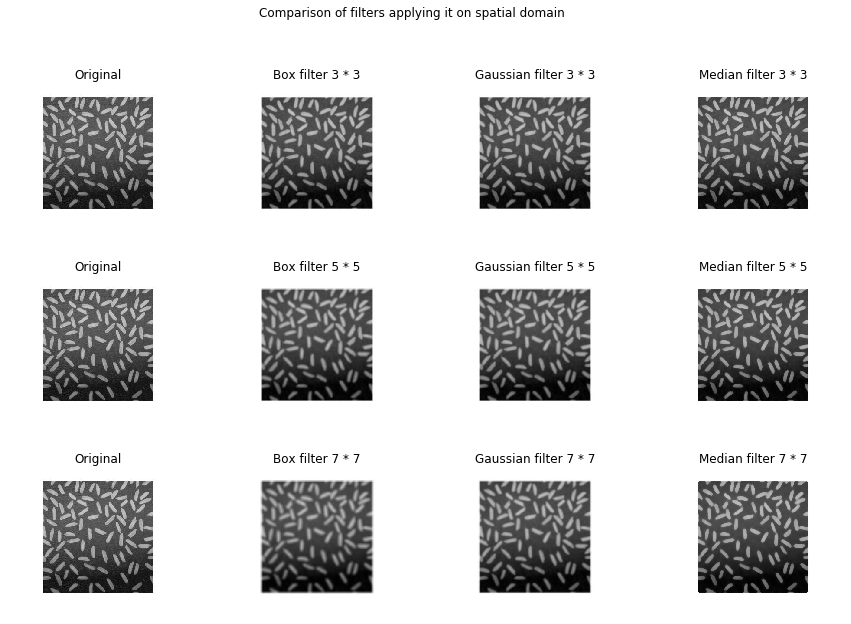

In [19]:
img = cv2.imread('ricegrains.jpg', 0)

fig, axs = plt.subplots(3, 4, figsize = (15,10))
kernel_size = [3,5,7]

for i in range(3):
    k = kernel_size[i]
    
    box = cv2.blur(img , (k,k))
    gaussian = cv2.GaussianBlur(img, (k,k), 1.5)
    median = cv2.medianBlur(img, k)
    
    axs[i,0].imshow(img, cmap ='gray')
    axs[i,0].set_title("Original")
    axs[i,0].axis('off')
    
    axs[i,1].imshow(box, cmap = 'gray')
    axs[i,1].set_title("Box filter {} * {}".format(k,k))
    axs[i,1].axis('off')
    
    axs[i,2].imshow(gaussian, cmap = 'gray')
    axs[i,2].set_title("Gaussian filter {} * {}".format(k,k))
    axs[i,2].axis('off')
    
    axs[i,3].imshow(median, cmap ='gray')
    axs[i,3].set_title("Median filter {} * {}".format(k,k))
    axs[i,3].axis('off')
    
plt.suptitle("Comparison of filters applying it on spatial domain")
plt.show()

b) Frequency domain filtering

In [39]:
def gaussian_lpf(img, radius):
    
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    M,N = img.shape
    out = np.zeros((M,N))
    
    cx = round(M/2)
    cy = round(N/2)
    
    H = np.zeros((M,N))
    
    for i in range(M):
        for j in range(N):
            d = (i-cx)**2 + (j-cy)**2
            H[i,j] = np.exp(-(d/(2*(radius**2))))
            
    out_fourier = fshift * H
    out = np.abs(np.fft.ifft2(out_fourier))
    
    out = out.astype(np.uint8)
    
    return out
                            
    

In [50]:
def butterworth_lpf(img, radius, n):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    M,N = img.shape
    out = np.zeros((M,N))
    
    cx = round(M/2)
    cy = round(N/2)
    
    H = np.zeros((M,N))
    
    for i in range(M):
        for j in range(N):
            d = np.sqrt((i-cx)**2 + (j-cy)**2)
            H[i,j] = 1/(1+((d/radius)**(2*n)))
            
    out_fourier = fshift * H
    out = np.abs(np.fft.ifft2(out_fourier))
    
    #out = out.astype(np.uint8)
    
    return out
    

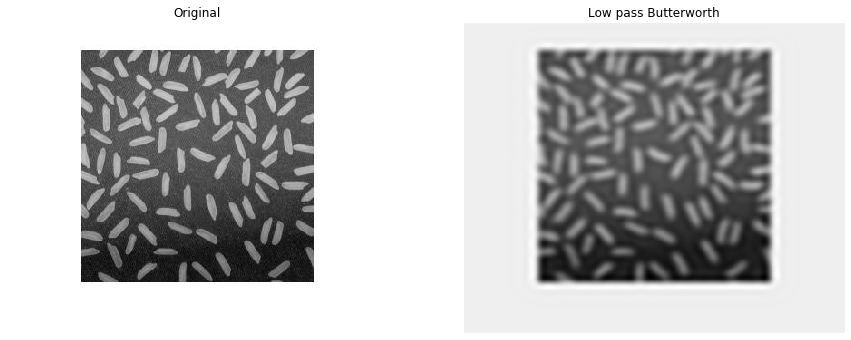

In [51]:
img = cv2.imread('ricegrains.jpg',0)
img_lp = butterworth_lpf(img, radius = 30,n=4)

fig, axs = plt.subplots(1,2,figsize = (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original")
axs[0].axis('off')

axs[1].imshow(img_lp, cmap = 'gray')
axs[1].set_title("Low pass Butterworth")
axs[1].axis('off')

plt.show()

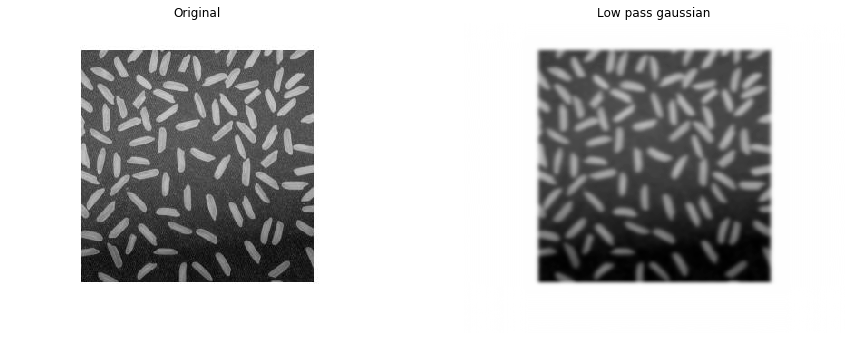

In [40]:
img = cv2.imread('ricegrains.jpg',0)
img_lp = gaussian_lpf(img, radius = 30)

fig, axs = plt.subplots(1,2,figsize = (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original")
axs[0].axis('off')

axs[1].imshow(img_lp, cmap = 'gray')
axs[1].set_title("Low pass gaussian")
axs[1].axis('off')

plt.show()

### 5) 

#### a) Spatial Domain Filtering:

**Unsharp Masking**

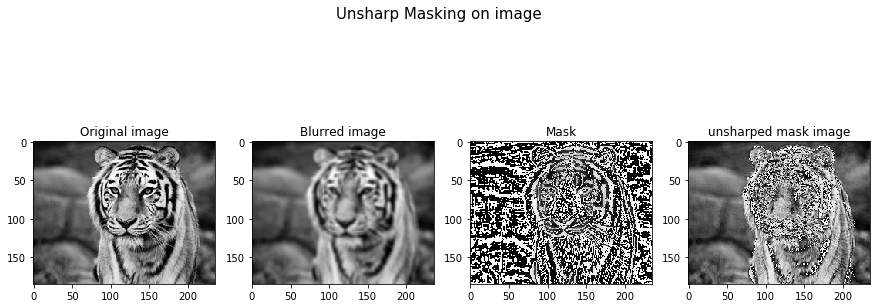

In [42]:
#unsharp masking
K = 1
img = cv2.imread('tigerbw.jpg',0)
x = cv2.getGaussianKernel(ksize = 5, sigma = 10)
kernel = x * x.T

blurred_img = cv2.filter2D(img, -1, kernel)

mask = img - blurred_img

unsharped_img = img + K*mask

fig, axs = plt.subplots(1,4, figsize = (15,6))

axs[0].imshow(img, cmap  ='gray')
axs[0].set_title("Original image")

axs[1].imshow(blurred_img, cmap  ='gray')
axs[1].set_title("Blurred image")

axs[2].imshow(mask, cmap  ='gray')
axs[2].set_title("Mask")

axs[3].imshow(unsharped_img, cmap  ='gray')
axs[3].set_title("unsharped mask image")

plt.suptitle("Unsharp Masking on image", fontsize = 15)

plt.show()

**Sobel edge detector**

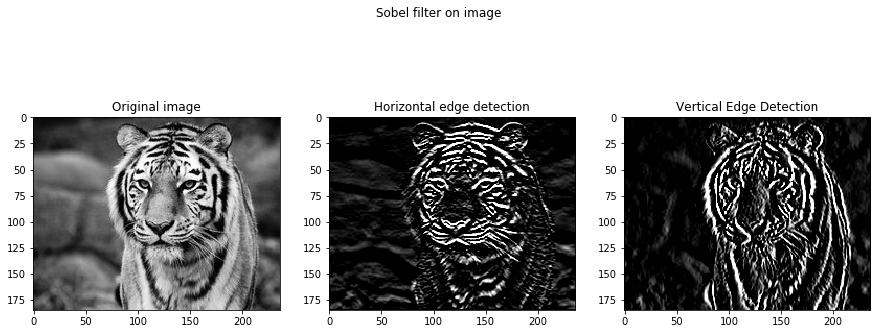

In [19]:
img_x = sobel(img, axis = 0)
img_y = sobel(img, axis = 1)

fig, axs = plt.subplots(1,3, figsize = (15,6))

axs[0].imshow(img, cmap  ='gray')
axs[0].set_title("Original image")

axs[1].imshow(img_x, cmap  ='gray')
axs[1].set_title("Horizontal edge detection")

axs[2].imshow(img_y, cmap  ='gray')
axs[2].set_title("Vertical Edge Detection")

plt.suptitle("Sobel filter on image")
plt.show()

**Laplace edge detection**

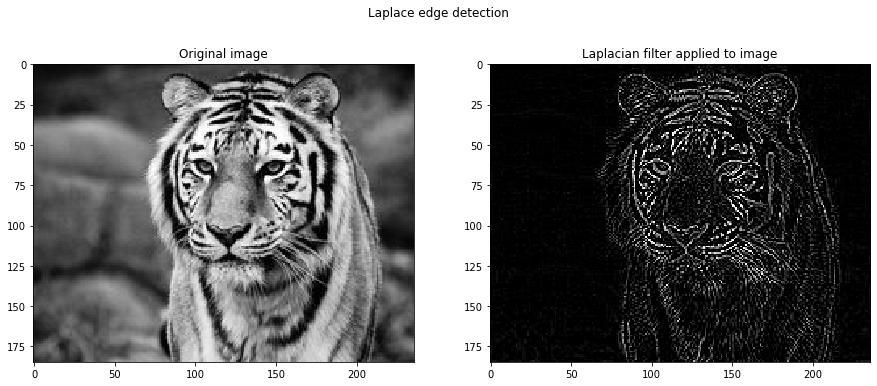

In [25]:
img2 = laplacian_filter(img)

fig, axs = plt.subplots(1,2, figsize = (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")

axs[1].imshow(img2, cmap = 'gray')
axs[1].set_title("Laplacian filter applied to image")

plt.suptitle("Laplace edge detection")
plt.show()

#### b) Frequency domain filtering

**Gaussian High Pass Filter**

In [30]:
def gaussian_hpf(img, radius):
    
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    M,N = img.shape
    out = np.zeros((M,N))
    
    cx = round(M/2)
    cy = round(N/2)
    
    H = np.zeros((M,N))
    
    for i in range(M):
        for j in range(N):
            d = (i-cx)**2 + (j-cy)**2
            H[i,j] = np.exp(-(d/(2*(radius**2))))
    
    H = 1 - H
    out_fourier = fshift * H
    out = np.abs(np.fft.ifft2(out_fourier))
    out = out.astype(np.uint8)
    return out
               

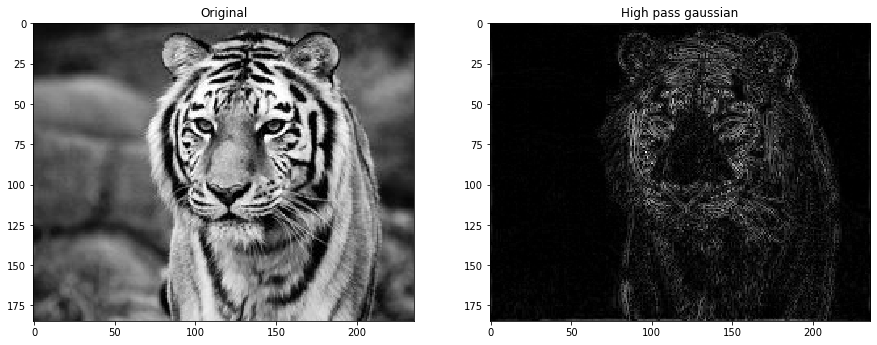

In [29]:
img = cv2.imread('tigerbw.jpg',0)
img_hp = gaussian_hpf(img, radius = 30)

fig, axs = plt.subplots(1,2,figsize = (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original")

axs[1].imshow(img_hp, cmap = 'gray')
axs[1].set_title("High pass gaussian")

plt.show()

**Butterworth High Pass filter**

In [34]:
def butterworth_hpf(img, radius, n):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    M,N = img.shape
    out = np.zeros((M,N))
    
    cx = round(M/2)
    cy = round(N/2)
    
    H = np.zeros((M,N))
    
    for i in range(M):
        for j in range(N):
            d = np.sqrt((i-cx)**2 + (j-cy)**2)
            H[i,j] = 1/(1+((d/radius)**(2*n)))
    
    #print (H.shape)
    #print (np.amin(H), np.amax(H))
    H = (1 - H)
    
    out_fourier = fshift * H
    out = np.abs(np.fft.ifft2(out_fourier))
    
    #out = out.astype(np.uint8)
    
    return out
    

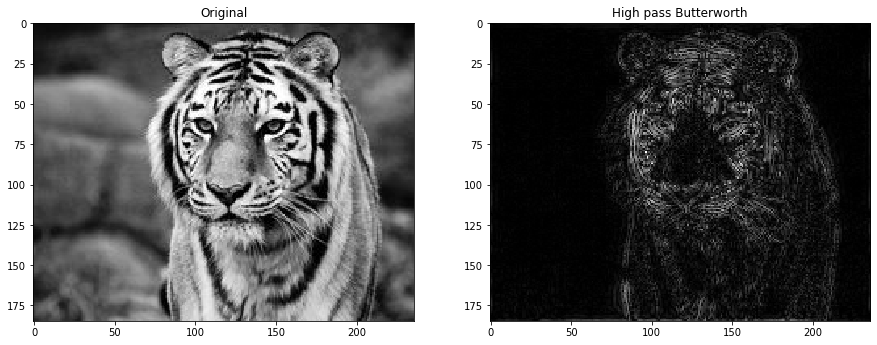

In [35]:
img = cv2.imread('tigerbw.jpg',0)
img_hp = butterworth_hpf(img, radius = 30, n = 4)

fig, axs = plt.subplots(1,2,figsize = (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original")

axs[1].imshow(img_hp, cmap = 'gray')
axs[1].set_title("High pass Butterworth")

plt.show()

### 6) 

To compare the performance of applying filtering in spatial domain and frequency domain, I am not using open-cv's filter2D function for applying in spatial domain as it is already an optimized implementation and my implementation of frequency domain filtering will not be an optimized one. Hence, the comparison won't be fair. So, I am using scipy's convolve2d function which convolves 2 matrices.

#### a) Applying box filter in spatial domain

(225, 225)
Time taken = 0.009964 seconds


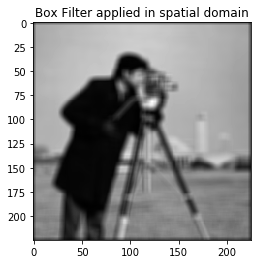

In [25]:
img = cv2.imread('cameraman.jpg',0)

size = 7
box_filter = (1/(size*size))*np.ones((size,size))
box_filter = box_filter.astype(np.float32)


#filter_spatial = cv2.filter2D(img, -1, box_filter)
start_time = time.time()
filter_spatial = convolve2d(img, box_filter, 'same')
end_time = time.time()
print (filter_spatial.shape)
print ("Time taken = %f seconds" %(end_time - start_time))

plt.imshow(filter_spatial, cmap = 'gray')
plt.title("Box Filter applied in spatial domain")
plt.show()

#### b) Applying box filter in frequency domain

In [26]:
def pad_img(img, new_shape):
    M,N = img.shape
    
    new_M, new_N = new_shape
    
    padded_img = np.zeros((new_M, new_N))
    
    padded_img[:M,:N] = img
    
    return padded_img

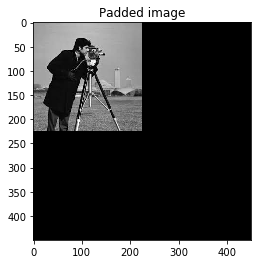

In [27]:
M, N = img.shape
P = 2*M
Q = 2*N
padded_img = pad_img(img, new_shape = (P,Q))
plt.imshow(padded_img, cmap = 'gray')
plt.title("Padded image")
plt.show()

In [28]:
padded_filter = pad_img(box_filter, (P,Q))


In [29]:
image_fft =  np.fft.fftshift(np.fft.fft2(padded_img))
kernel_fft = np.fft.fftshift(np.fft.fft2(padded_filter))

start_time = time.time()
conv_fourier = np.multiply(image_fft, kernel_fft)
end_time = time.time()

transformed_spatial = np.abs(np.fft.ifft2(conv_fourier))

transformed_spatial = transformed_spatial.astype(np.uint8)

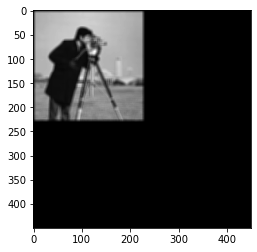

In [31]:
plt.imshow(transformed_spatial, cmap ='gray')
plt.show()

Thus time taken to multiply in the frequency domain is slightly faster than convolution in spatial domain.

(450, 450)
(225, 225)


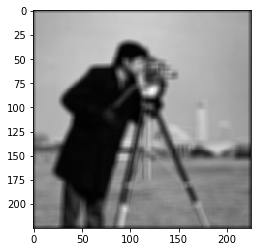

In [33]:
print (transformed_spatial.shape)
transformed_spatial_cut = transformed_spatial[3:3+M,3:3+N]
print (transformed_spatial_cut.shape)
plt.imshow(transformed_spatial_cut, cmap = 'gray')
plt.show()

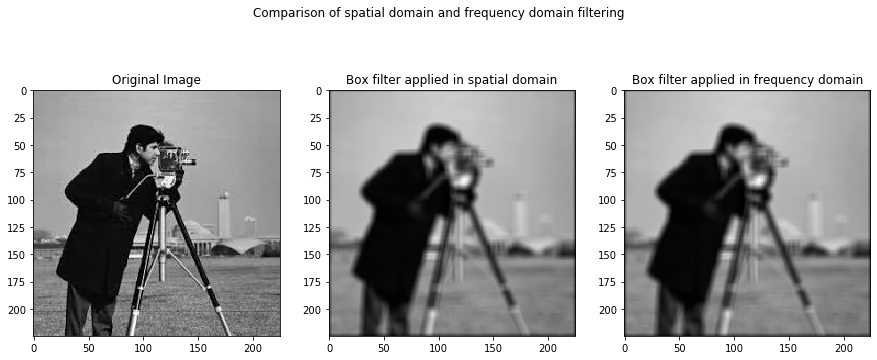

In [34]:
fig, axs = plt.subplots(1,3, figsize= (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original Image")

axs[1].imshow(filter_spatial, cmap = 'gray')
axs[1].set_title("Box filter applied in spatial domain")

axs[2].imshow(transformed_spatial_cut, cmap ='gray')
axs[2].set_title("Box filter applied in frequency domain")

plt.suptitle("Comparison of spatial domain and frequency domain filtering")
plt.show()

In [35]:
print ("Time taken for frequency domain = %f" %(end_time - start_time))

Time taken for frequency domain = 0.000998


#### c)

The time taken for multiplication in frequency domain is 0.000998 seconds while the time taken for convolution in spatial domain is 0.009964 seconds and hence we can we that frequency domain operation is about 10 times faster than convolution in spatial domain.